<a href="https://colab.research.google.com/github/Maria-Bethania/Challenge-Tunts/blob/main/SOFTWARE_ENGINEERING_DESAFIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

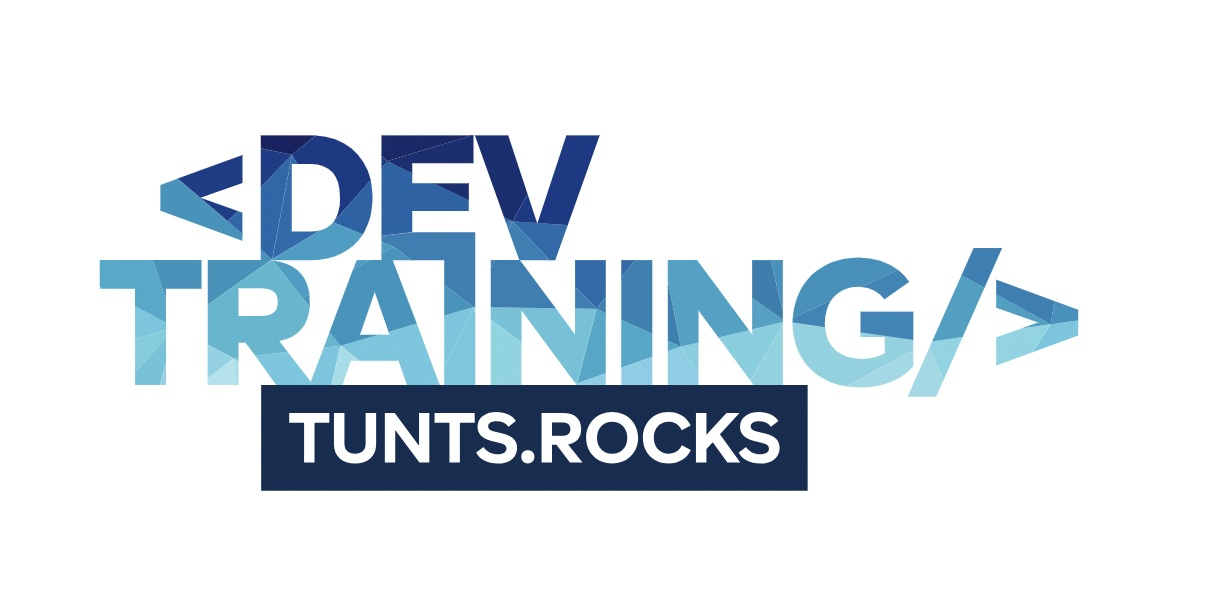

# **Challenge Tunts.Rocks 2024**



## **Challenge description**

*  Create an application in a programming language of your preference (in case you are applying for a position in a specific programming language, for example, Node.js developer, use the specific language/technology mentioned in the job description).



### **Step by step**
    First step: Create a copy of the spreadsheet and access it;
    Second step: Modify the name of the spreadsheet to "Software Engineering – Challenge [Name]";
    Third step: Make the spreadsheet publicly editable;
      - Use the newly created spreadsheet to perform the test.


### Rules

Calculate the situation of each student based on the average of the 3 exams (P1, P2, and P3), as shown in the figure:

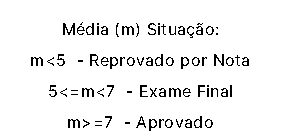

* If the number of absences exceeds 25% of the total number of classes, the student will have the status "Failed Due to Absences," regardless of the average.

If the situation is "Final Exam," it is necessary to calculate the "Final Approval Grade" for each student according to the following formula:

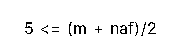

* If the student's situation is different from "Final Exam," fill in the "Final Approval Grade" field with 0.

* Round the result to the nearest whole number (round up) if necessary. Use log lines to track the application's activities.

* Code source texts (attributes, classes, functions, comments, etc.) should be written in English, except for identifiers and pre-defined texts in this challenge.

* Specify the commands used to run the application.

* Publish the source code in a Git repository.

## **Library Import Statements**

In [1]:
# Import Libraries
import pandas as pd

In [2]:
!pip install gspread pandas


In [3]:
import warnings
warnings.filterwarnings("ignore")

## **EXTRACTION**

* The file that was in the '.gsheet' format has been manually downloaded as a .xlsx file;

* It is known that there were a total of 60 classes;

* The pandas library will be used to convert it to CSV.

In [39]:
xlsx_file_path = '/content/Engenharia de Software - Desafio - Maria Betânia Paiva Nunes.xlsx'
df = pd.read_excel(xlsx_file_path)

In [40]:
# Exporting the DataFrame to a CSV file

df.to_csv('EngSoftTunts.csv', index=False)


In [41]:
display(df.head(10))

,Matricula,Aluno,Faltas,P1,P2,P3,Situação,Nota para Aprovação Final
0,1,Eduardo,8,35,63,61,NaN,NaN
1,2,Murilo,8,64,97,36,NaN,NaN
2,3,Guilherme,19,68,74,51,NaN,NaN
3,4,Flavia,23,66,98,62,NaN,NaN
4,5,Ruan,13,80,65,41,NaN,NaN
5,6,Arnando,23,83,68,77,NaN,NaN
6,7,Lucas,5,38,53,80,NaN,NaN
7,8,Fabio,10,53,96,89,NaN,NaN
8,9,Alisson,15,45,61,68,NaN,NaN
9,10,Felipe,12,32,41,85,NaN,NaN


In [42]:
# Downloading the CSV file
from google.colab import files
files.download('EngSoftTunts.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **PRE-ANALYSIS AND TRANSFORMATION**

In [43]:
# Dataframe Visualization
df.dtypes

Matricula                      int64
Aluno                         object
Faltas                         int64
P1                             int64
P2                             int64
P3                             int64
Situação                     float64
Nota para Aprovação Final    float64
dtype: object

In [44]:
# CONVERTING THE GRADE COLUMNS TO FLOAT, AND THEN RENAMING THEM.

grade_columns_indices = [3, 4, 5]

# Converting the values in columns P1, P2, and P3 to float by dividing by 10
df.iloc[:, grade_columns_indices] = df.iloc[:, grade_columns_indices].astype(float) / 10
# Renaming the columns to Nota1, Nota2, and Nota3
df = df.rename(columns={'P1': 'Nota1', 'P2': 'Nota2', 'P3': 'Nota3'})

df.head()

,Matricula,Aluno,Faltas,Nota1,Nota2,Nota3,Situação,Nota para Aprovação Final
0,1,Eduardo,8,3.5,6.3,6.1,NaN,NaN
1,2,Murilo,8,6.4,9.7,3.6,NaN,NaN
2,3,Guilherme,19,6.8,7.4,5.1,NaN,NaN
3,4,Flavia,23,6.6,9.8,6.2,NaN,NaN
4,5,Ruan,13,8.0,6.5,4.1,NaN,NaN


In [45]:
# Detailed information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Matricula                  24 non-null     int64  
 1   Aluno                      24 non-null     object 
 2   Faltas                     24 non-null     int64  
 3   Nota1                      24 non-null     float64
 4   Nota2                      24 non-null     float64
 5   Nota3                      24 non-null     float64
 6   Situação                   0 non-null      float64
 7   Nota para Aprovação Final  0 non-null      float64
dtypes: float64(5), int64(2), object(1)
memory usage: 1.6+ KB


In [46]:
# CONVERTING THE 'SITUAÇÃO' COLUMN TO STRING.

df['Situação'] = df['Situação'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Matricula                  24 non-null     int64  
 1   Aluno                      24 non-null     object 
 2   Faltas                     24 non-null     int64  
 3   Nota1                      24 non-null     float64
 4   Nota2                      24 non-null     float64
 5   Nota3                      24 non-null     float64
 6   Situação                   24 non-null     object 
 7   Nota para Aprovação Final  0 non-null      float64
dtypes: float64(4), int64(2), object(2)
memory usage: 1.6+ KB


## **LOADING**

In [47]:
# Using the 'to_excel' method to export the DataFrame to an '.xlsx' file
df.to_excel("EngSoftTunts.xlsx", index=False)

In [48]:
# Mounting Google Drive to the Google Colab environment;
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
destiny = '/content/drive/MyDrive/Desafio - Tunts Rock'
!mv EngSoftTunts.xlsx "{destiny}"

## **ANALYSES**

### Calculating the average of the grades

In [18]:
df['Média'] = df[['Nota1', 'Nota2', 'Nota3']].mean(axis=1).round(1)

In [15]:
df.head()

,Matricula,Aluno,Faltas,Nota1,Nota2,Nota3,Situação,Nota para Aprovação Final,Média
0,1,Eduardo,8,3.5,6.3,6.1,nan,NaN,5.3
1,2,Murilo,8,6.4,9.7,3.6,nan,NaN,6.6
2,3,Guilherme,19,6.8,7.4,5.1,nan,NaN,6.4
3,4,Flavia,23,6.6,9.8,6.2,nan,NaN,7.5
4,5,Ruan,13,8.0,6.5,4.1,nan,NaN,6.2


### Case Resolution

In [16]:
df = df[['Matricula', 'Aluno', 'Faltas', 'Nota1', 'Nota2', 'Nota3', 'Média', 'Situação', 'Nota para Aprovação Final']]
df.head()

,Matricula,Aluno,Faltas,Nota1,Nota2,Nota3,Média,Situação,Nota para Aprovação Final
0,1,Eduardo,8,3.5,6.3,6.1,5.3,nan,NaN
1,2,Murilo,8,6.4,9.7,3.6,6.6,nan,NaN
2,3,Guilherme,19,6.8,7.4,5.1,6.4,nan,NaN
3,4,Flavia,23,6.6,9.8,6.2,7.5,nan,NaN
4,5,Ruan,13,8.0,6.5,4.1,6.2,nan,NaN


In [17]:
# Calculating the maximum allowed number of absences (25% of the total number of classes)
absence_limit = 0.25 * 60 # 60 is the total number of classes

# Determining the situation based on the average and the number of absences
df['Situação'] = df.apply(lambda row: 'Reprovado por Falta' if row['Faltas'] > absence_limit else
                                 'Reprovado por Nota' if row['Média'] < 5 else
                                 'Exame Final' if 5 <= row['Média'] < 7 else
                                 'Aprovado', axis=1)

# Calculating the "Final Approval Grade" (naf) only for students in "Final Exam"
df['Nota para Aprovação Final'] = df.apply(lambda row: round(10 - row['Média']) if row['Situação'] == 'Exame Final' else 0, axis=1)

df.head()

,Matricula,Aluno,Faltas,Nota1,Nota2,Nota3,Média,Situação,Nota para Aprovação Final
0,1,Eduardo,8,3.5,6.3,6.1,5.3,Exame Final,5
1,2,Murilo,8,6.4,9.7,3.6,6.6,Exame Final,3
2,3,Guilherme,19,6.8,7.4,5.1,6.4,Reprovado por Falta,0
3,4,Flavia,23,6.6,9.8,6.2,7.5,Reprovado por Falta,0
4,5,Ruan,13,8.0,6.5,4.1,6.2,Exame Final,4


## OVERALL ANALYSIS

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

### Descriptive Statistics

In [22]:
df_statistics = df.describe()
display(df_statistics.round(1))

,Matricula,Faltas,Nota1,Nota2,Nota3,Média,Nota para Aprovação Final
count,24.0,24.0,24.0,24.0,24.0,24.0,24.0
mean,12.5,12.8,5.9,7.1,6.8,6.6,1.8
std,7.1,6.6,2.1,2.0,2.1,1.1,2.2
min,1.0,0.0,3.2,3.7,3.2,4.3,0.0
25%,6.8,8.0,4.0,5.3,5.1,5.8,0.0
50%,12.5,12.5,5.6,7.0,7.2,6.5,0.0
75%,18.2,16.8,8.1,9.0,8.6,7.5,4.0
max,24.0,23.0,9.6,9.8,10.0,9.0,5.0


### Distribution of Situations

In [25]:
# Distribution of student situations (Quantity of Approved, Failed Due to Absences, Final Exam).
situation_distribution = df['Situação'].value_counts()
display(situation_distribution)

Exame Final            10
Reprovado por Falta     8
Aprovado                5
Reprovado por Nota      1
Name: Situação, dtype: int64

    Um número significativo de alunos (10) foi para o Exame Final, indicando uma faixa limítrofe entre aprovação e reprovação.

    A presença de 8 alunos reprovados por falta destaca a importância da frequência às aulas como um desafio para parte da turma.

    Apenas 1 aluno foi reprovado por nota, indicando que a maioria não enfrentou problemas significativos no desempenho nas provas.

### Correlation between variables

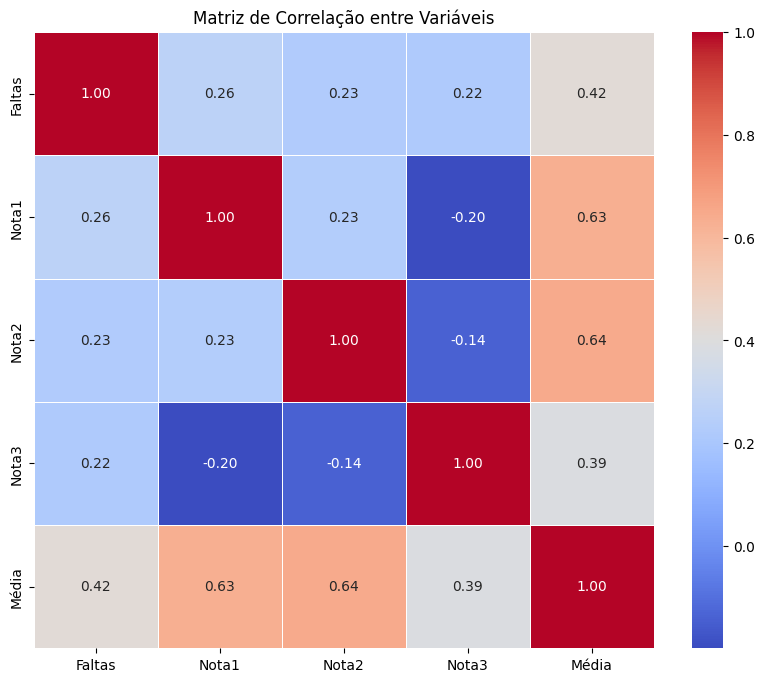

In [29]:
# Calculating the correlation between variables - Absences, Grades, Average;
# Checking if there is any relationship between them.
correlation = df[['Faltas', 'Nota1', 'Nota2', 'Nota3', 'Média']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix between Variables')
plt.show()

    The amount of absences shows a moderate positive correlation with the average:

    Students with higher attendance tend to achieve higher averages.

    Individual grades exhibit strong and moderate positive correlations with the average:

    Robust performance in each exam is associated with higher averages.

    Consistent attendance and performance in individual assessments are positively correlated with overall academic success of the students.

### ANALYSIS OF ABSENCES

In [32]:
average_absences_by_status = df.groupby('Situação')['Faltas'].mean().round(1)
display(average_absences_by_status)

Situação
Aprovado                7.2
Exame Final            10.1
Reprovado por Falta    20.1
Reprovado por Nota      8.0
Name: Faltas, dtype: float64

    *Approved students show an average of 7.2 absences, suggesting relatively regular attendance.
    *Students who went to the Final Exam have a higher average of 10 absences.
    *Students failed due to grades have an average of 8 absences: academic status more related to performance in assessments than attendance.


### Comparison of averages by situation

In [33]:
average_grades_by_status = df.groupby('Situação')[['Nota1', 'Nota2', 'Nota3', 'Média']].mean().round(1)
display(average_grades_by_status)

,Nota1,Nota2,Nota3,Média
Situação,,,,
Aprovado,7.2,7.5,8.0,7.5
Exame Final,5.0,6.3,6.0,5.8
Reprovado por Falta,6.6,8.1,7.4,7.3
Reprovado por Nota,3.6,4.6,4.8,4.3


    The analysis of averages by situation reveals distinct performance patterns among student groups.

    Those with consistently high averages in all three assessments, reflecting a solid performance.
    Students who went through the Final Exam show lower grades, indicating challenges in individual exams.
    Students failed due to absences present intermediate averages, suggesting a possible influence of attendance on grades.


Students failed due to grades have lower averages, highlighting the influence of performance in assessments on their academic status.

This analysis emphasizes the complexity of the variables contributing to different student situations and highlights specific areas that may require attention to improve overall performance.